In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats        
import statistics
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data_full_cleaned_1.csv')
data.head(10)

,n_rooms,n_toilets,area,x,y,distance_UBND,district,polistic,furniture,house_direct,balcony_direct,n_hospitals,n_schools,price,price_class
0,2,2,75.0,21.008852,105.743919,6.97,Nam Tu Liem,so do,day du,Dong - Bac,Dong - Nam,0,0,43.333333,5
1,3,2,100.0,21.084397,105.792360,4.33,Bac Tu Liem,so do,cao cap,Tay,Bac,1,5,39.000000,4
2,3,3,102.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.215686,4
3,3,3,103.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.500000,4
4,2,2,74.0,21.044233,105.767319,3.74,Bac Tu Liem,so do,day du,Bac,Dong - Nam,0,6,38.513514,4
5,2,2,86.0,21.016827,105.815224,2.81,Dong Da,hdmb,day du,Dong - Bac,Tay - Nam,4,25,77.906977,8
6,3,2,115.0,21.032419,105.831360,2.86,Ba Dinh,hdmb,day du,Tay - Nam,Nam,2,9,116.000000,11
7,3,2,105.5,20.991955,105.785103,5.46,Nam Tu Liem,so do,day du,Tay - Bac,Dong - Bac,1,2,42.000000,5
8,2,2,59.0,21.008852,105.743919,6.97,Nam Tu Liem,hdmb,nguyen_ban,Dong - Bac,Tay - Nam,0,0,38.135593,4
9,3,2,69.0,20.984837,105.859856,8.01,Hoang Mai,so do,co ban,Dong,Dong,1,5,37.681159,4


In [ ]:
# create the bins for the 13 classes
bins = [0,10,15,20,30,40,50,60,70,80,90,100,120,400]

# use the 'cut' function to divide the 'price' column into 14 classes
data['price_class'] = pd.cut(data['price'], bins, labels=False)
# you can now access the 'price_class' column to see which class each price belongs to
print(data['price_class'].head(20))
data.to_csv('/content/drive/MyDrive/Colab_Notebooks/data_full_cleaned_1.csv', index=False)
data.head()

0      5
1      4
2      4
3      4
4      4
5      8
6     11
7      5
8      4
9      4
10     4
11     4
12     5
13     5
14     3
15     5
16     3
17     3
18     6
19     5
Name: price_class, dtype: int64


,n_rooms,n_toilets,area,x,y,distance_UBND,district,polistic,furniture,house_direct,balcony_direct,n_hospitals,n_schools,price,price_class
0,2,2,75.0,21.008852,105.743919,6.97,Nam Tu Liem,so do,day du,Dong - Bac,Dong - Nam,0,0,43.333333,5
1,3,2,100.0,21.084397,105.792360,4.33,Bac Tu Liem,so do,cao cap,Tay,Bac,1,5,39.000000,4
2,3,3,102.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.215686,4
3,3,3,103.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.500000,4
4,2,2,74.0,21.044233,105.767319,3.74,Bac Tu Liem,so do,day du,Bac,Dong - Nam,0,6,38.513514,4


In [ ]:
data.head()

,n_rooms,n_toilets,area,x,y,distance_UBND,district,polistic,furniture,house_direct,balcony_direct,n_hospitals,n_schools,price,price_class
0,2,2,75.0,21.008852,105.743919,6.97,Nam Tu Liem,so do,day du,Dong - Bac,Dong - Nam,0,0,43.333333,5
1,3,2,100.0,21.084397,105.792360,4.33,Bac Tu Liem,so do,cao cap,Tay,Bac,1,5,39.000000,4
2,3,3,102.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.215686,4
3,3,3,103.0,21.002666,105.815430,4.17,Thanh Xuan,so do,cao cap,Tay - Bac,Dong - Nam,4,17,39.500000,4
4,2,2,74.0,21.044233,105.767319,3.74,Bac Tu Liem,so do,day du,Bac,Dong - Nam,0,6,38.513514,4


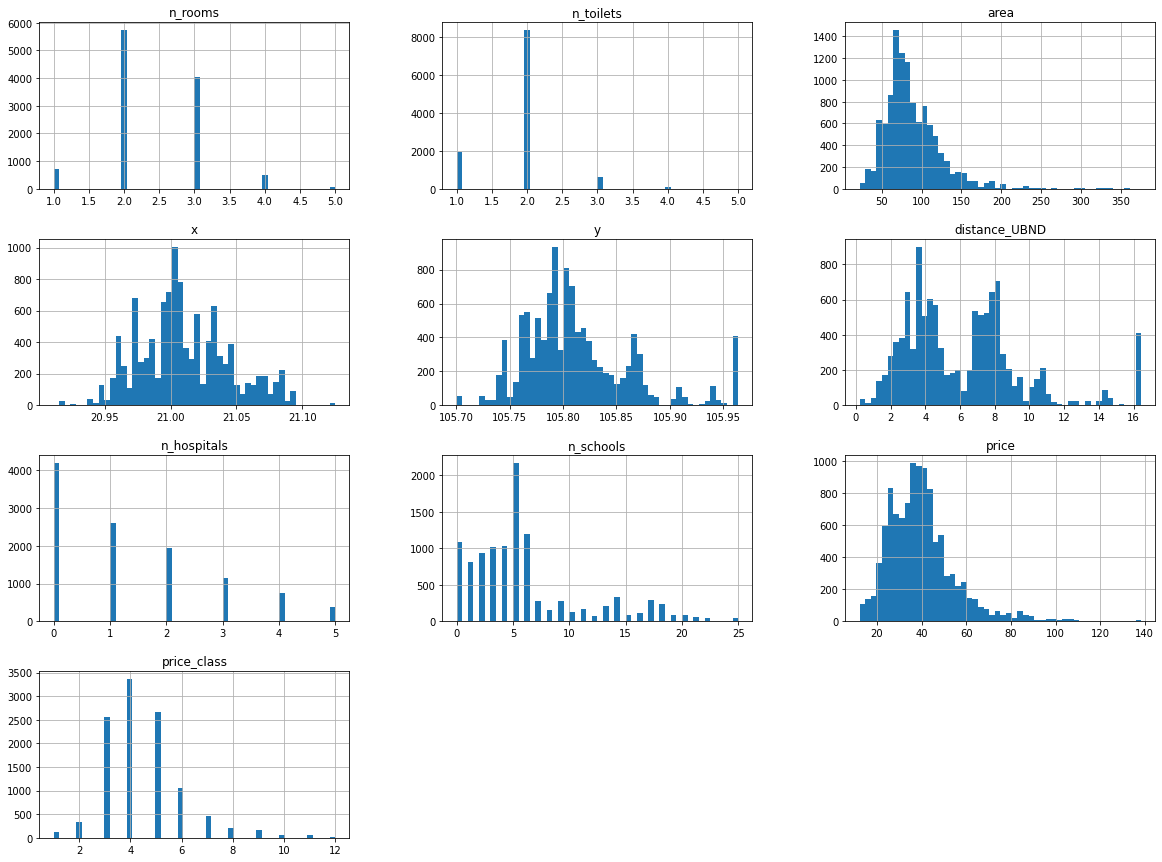

In [ ]:
# Plot histograms of each numerical column to visualize the distribution of data
data.hist(bins=50, figsize=(20,15))
plt.show()

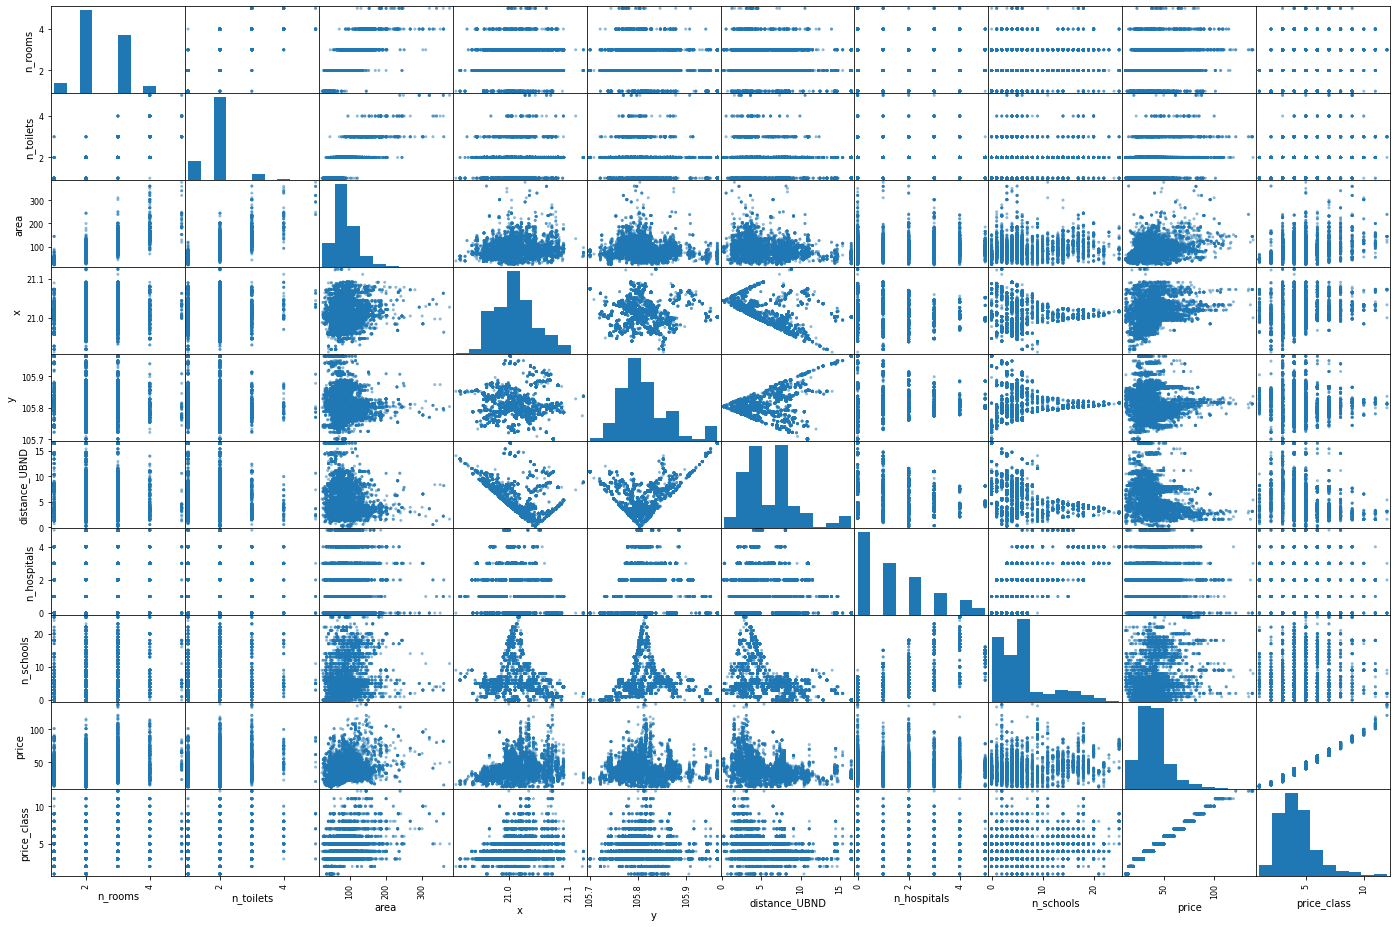

In [ ]:
# Create a scatter matrix to visualize the relationship between all numerical columns
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(24,16))
plt.show()

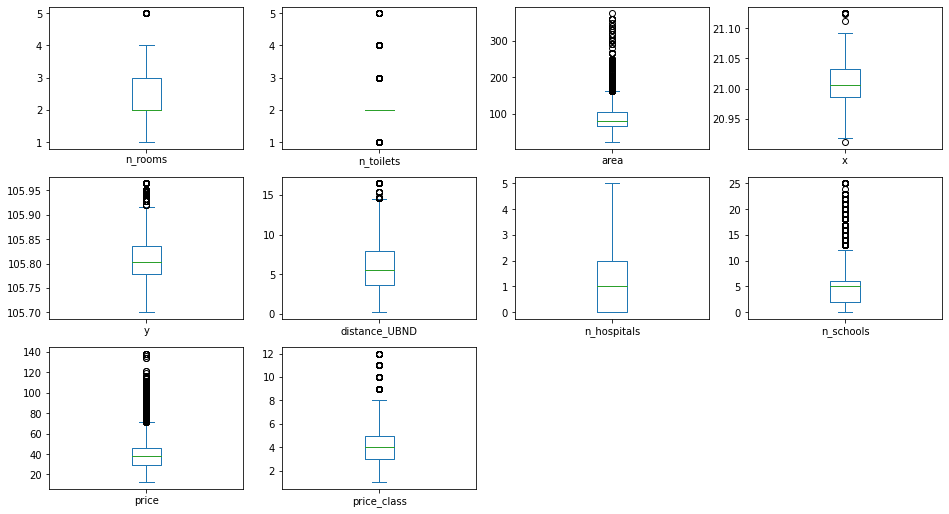

In [ ]:
# Create box plots to visualize the distribution of each numerical column
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16, 12))
plt.show()

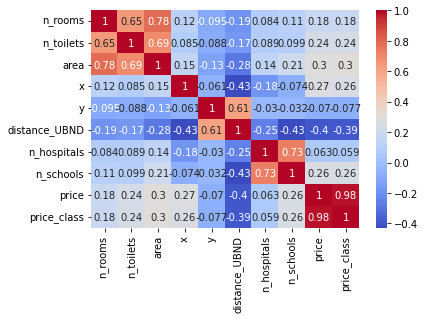

In [ ]:
# Create a heatmap to visualize the correlation between all numerical columns
import seaborn as sns
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

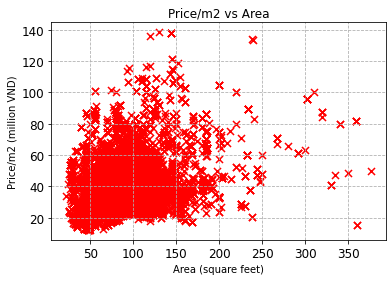

In [ ]:
# Create the scatter plot
plt.scatter(data["area"], data["price"], c='r', marker='x', s=50)

# Add a grid to the plot
plt.grid(True, linestyle='--')

# Add a title and a legend
plt.title("Price/m2 vs Area")
plt.xlabel("Area (square feet)")
plt.ylabel("Price/m2 (million VND)")

# Change the font size of the labels and tick marks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.utils import resample


# Get the unique class labels
class_labels = data.price_class.unique()

# Create a list to store the oversampled dataframes
data_oversampled = []

# Loop over each class label
for label in class_labels:
    # Separate majority and minority classes
    data_majority = data[data.price_class!=label]
    data_minority = data[data.price_class==label]
 
    # Upsample minority class
    data_minority_upsampled = resample(data_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(data_majority),    # to match majority class
                                     random_state=123) # reproducible results
 
    # Combine majority class with upsampled minority class
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])
    
    # Add the oversampled dataframe to the list
    data_oversampled.append(data_upsampled)

# Concatenate all the oversampled dataframes
data_oversampled = pd.concat(data_oversampled)

# Display new class counts
print(data_oversampled.price_class.value_counts())

4     44576
5     37726
3     36526
6     21456
7     15576
2     14336
8     13036
9     12666
1     12186
11    11606
10    11526
12    11136
Name: price_class, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# create the label encoder
le = LabelEncoder()

# fit and transform the non-numeric column
data_oversampled['polistic'] = le.fit_transform(data_oversampled['polistic'])
data_oversampled['furniture'] = le.fit_transform(data_oversampled['furniture'])
data_oversampled['district'] = le.fit_transform(data_oversampled['district'])
data_oversampled['house_direct'] = le.fit_transform(data_oversampled['house_direct'])
data_oversampled['balcony_direct'] = le.fit_transform(data_oversampled['balcony_direct'])

# create the feature and target arrays
X = data_oversampled[['area','n_rooms','n_toilets','x','y','polistic','furniture','distance_UBND','house_direct','balcony_direct','n_schools','n_hospitals']] 
y = data_oversampled['price_class']

# Scale the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# MLPClassifier


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10), max_iter=300, activation = 'relu',solver='adam',random_state=20)
# Train MLP Classifer
model = clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6010604278847146


In [18]:
from sklearn.metrics import accuracy_score
def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
feature = ['area','n_rooms','n_toilets','x','y','polistic','furniture','distance_UBND','house_direct','balcony_direct','n_schools','n_hospitals']
print('Feature importances:')
for j in range(X_test.shape[1]):
  print(feature[j] + ': ' + str(f[j]))

Feature importances:
area: 0.2950430154112768
n_rooms: 0.16449897877081143
n_toilets: 0.12365806358441145
x: 0.2832508097625384
y: 0.2711241773431536
polistic: 0.0699820511233522
furniture: 0.07000557034102861
distance_UBND: 0.331069918095356
house_direct: 0.12546429824018468
balcony_direct: 0.11444430690515967
n_schools: 0.20160260774483718
n_hospitals: 0.17669183635575925


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-Score:", f1_score)

Accuracy: 0.6010604278847146
              precision    recall  f1-score   support

           1       0.80      0.85      0.82      2472
           2       0.68      0.71      0.69      2834
           3       0.63      0.71      0.66      7273
           4       0.46      0.38      0.41      8891
           5       0.43      0.50      0.46      7578
           6       0.41      0.35      0.37      4371
           7       0.44      0.29      0.35      3195
           8       0.58      0.76      0.66      2580
           9       0.81      0.75      0.78      2540
          10       0.89      0.94      0.91      2251
          11       0.92      0.93      0.93      2335
          12       0.98      1.00      0.99      2151

    accuracy                           0.60     48471
   macro avg       0.67      0.68      0.67     48471
weighted avg       0.59      0.60      0.59     48471

Average Precision: 0.5933849576901181
Average Recall: 0.6010604278847146
Average F1-Score: 0.59362367544

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20), (30, 30, 30), (50, 50, 50), (100, 100, 100), (200, 200, 200), (250, 250, 250), (300, 300, 300), (350, 350, 350), (400, 400, 400), (500, 500, 500)]
}
# Create an instance of the MLP classifier
clf = MLPClassifier(alpha=1e-05, max_iter=300, activation = 'relu',solver='adam',random_state=20)
# Create an instance of the grid search using the MLP classifier and the parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5)
# Perform the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters and score from the grid search
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)